In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from typing import Tuple, List

In [93]:
nRowsRead = None # specify 'None' if want to read whole file
# model_2015_ST4000DM000.csv has 1243993 rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('../input/model_2015_ST4000DM000.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'model_2015_ST4000DM000.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1243993 rows and 95 columns


In [94]:
df.head(5)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2015-01-01,Z300YN6R,ST4000DM000,4000787030016,0,117.0,134283496.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,W300T09N,ST4000DM000,4000787030016,0,120.0,235812736.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,Z3025923,ST4000DM000,4000787030016,1,117.0,159417104.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,Z300GPJ7,ST4000DM000,4000787030016,0,110.0,25333728.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,Z300VALY,ST4000DM000,4000787030016,0,117.0,139107936.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
df.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,1.243993e+06,1.243993e+06,1.243992e+06,1.243992e+06,0.0,0.0,1.243992e+06,1243992.0,1.243992e+06,1.243992e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.000787e+12,3.459827e-02,1.152606e+02,1.210311e+08,NaN,NaN,9.471315e+01,0.0,1.000000e+02,7.979660e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.000000e+00,1.827601e-01,3.859535e+00,7.038963e+07,NaN,NaN,2.977639e+00,0.0,1.267961e-03,1.104253e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000787e+12,0.000000e+00,8.600000e+01,0.000000e+00,NaN,NaN,9.100000e+01,0.0,9.900000e+01,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000787e+12,0.000000e+00,1.140000e+02,5.933724e+07,NaN,NaN,9.200000e+01,0.0,1.000000e+02,3.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000787e+12,0.000000e+00,1.170000e+02,1.200900e+08,NaN,NaN,9.400000e+01,0.0,1.000000e+02,6.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000787e+12,0.000000e+00,1.180000e+02,1.820898e+08,NaN,NaN,9.800000e+01,0.0,1.000000e+02,1.000000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.000787e+12,1.000000e+00,1.200000e+02,2.441401e+08,NaN,NaN,1.000000e+02,0.0,1.000000e+02,1.173000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243993 entries, 0 to 1243992
Data columns (total 95 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   date                  1243993 non-null  object 
 1   serial_number         1243993 non-null  object 
 2   model                 1243993 non-null  object 
 3   capacity_bytes        1243993 non-null  int64  
 4   failure               1243993 non-null  int64  
 5   smart_1_normalized    1243992 non-null  float64
 6   smart_1_raw           1243992 non-null  float64
 7   smart_2_normalized    0 non-null        float64
 8   smart_2_raw           0 non-null        float64
 9   smart_3_normalized    1243992 non-null  float64
 10  smart_3_raw           1243992 non-null  float64
 11  smart_4_normalized    1243992 non-null  float64
 12  smart_4_raw           1243992 non-null  float64
 13  smart_5_normalized    1243992 non-null  float64
 14  smart_5_raw           1243992 non-

In [97]:
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned = df_cleaned.dropna(axis = 0, how = 'all')
df_cleaned.drop(list(df_cleaned.filter(regex = 'normalized')), axis = 1, inplace = True)
df_cleaned = df_cleaned[[i for i in df_cleaned if df_cleaned[i].nunique()>1]]
df_cleaned.describe()

,failure,smart_1_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_183_raw,smart_184_raw,smart_187_raw,...,smart_190_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
count,1.243993e+06,1.243992e+06,1.243992e+06,1.243992e+06,1.243992e+06,1.243992e+06,1.243992e+06,1.243992e+06,1.243992e+06,1.243992e+06,...,1.243992e+06,1.243992e+06,1.243992e+06,1.243992e+06,1.243992e+06,1.243992e+06,1.243992e+06,1.243992e+06,1.243992e+06,1.243992e+06
mean,3.459827e-02,1.210311e+08,7.979660e+00,7.828945e+00,2.282310e+10,8.404426e+03,9.129929e+00,1.893224e+00,8.503270e-03,8.542901e-02,...,2.513167e+01,2.761037e+00,2.025004e+04,2.513167e+01,2.022320e-01,2.022320e-01,3.629594e+00,5.537474e+13,1.704760e+10,9.072641e+10
std,1.827601e-01,7.038963e+07,1.104253e+01,3.166788e+02,2.135394e+12,5.755087e+03,1.613195e+02,7.591943e+01,2.166251e-01,5.535088e+00,...,4.698634e+00,9.643025e+00,3.121592e+04,4.698634e+00,1.308239e+01,1.308239e+01,1.095444e+02,8.546983e+13,6.379613e+09,7.989037e+10
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.400000e+01,0.000000e+00,2.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,1.641000e+03
25%,0.000000e+00,5.933724e+07,3.000000e+00,0.000000e+00,1.056154e+08,3.031000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.200000e+01,0.000000e+00,3.052000e+03,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.921000e+03,1.314363e+10,7.773235e+09
50%,0.000000e+00,1.200900e+08,6.000000e+00,0.000000e+00,2.162635e+08,7.231000e+03,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.500000e+01,1.000000e+00,1.268300e+04,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.506000e+03,1.743507e+10,8.951156e+10
75%,0.000000e+00,1.820898e+08,1.000000e+01,0.000000e+00,4.404549e+08,1.359800e+04,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,2.800000e+01,3.000000e+00,2.599500e+04,2.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.027872e+14,2.172288e+10,1.369140e+11
max,1.000000e+00,2.441401e+08,1.173000e+03,6.472000e+04,2.814711e+14,2.271900e+04,1.641500e+04,6.032000e+03,1.800000e+01,5.880000e+03,...,4.100000e+01,1.167000e+03,4.532930e+05,4.100000e+01,5.832000e+03,5.832000e+03,5.415000e+03,2.814707e+14,4.215214e+10,6.463693e+11


In [98]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243993 entries, 0 to 1243992
Data columns (total 24 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   date           1243993 non-null  object 
 1   serial_number  1243993 non-null  object 
 2   failure        1243993 non-null  int64  
 3   smart_1_raw    1243992 non-null  float64
 4   smart_4_raw    1243992 non-null  float64
 5   smart_5_raw    1243992 non-null  float64
 6   smart_7_raw    1243992 non-null  float64
 7   smart_9_raw    1243992 non-null  float64
 8   smart_12_raw   1243992 non-null  float64
 9   smart_183_raw  1243992 non-null  float64
 10  smart_184_raw  1243992 non-null  float64
 11  smart_187_raw  1243992 non-null  float64
 12  smart_188_raw  1243992 non-null  float64
 13  smart_189_raw  1243992 non-null  float64
 14  smart_190_raw  1243992 non-null  float64
 15  smart_192_raw  1243992 non-null  float64
 16  smart_193_raw  1243992 non-null  float64
 17  smart_19

In [99]:
df_cleaned.head()

,date,serial_number,failure,smart_1_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_183_raw,...,smart_190_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,2015-01-01,Z300YN6R,0,134283496.0,3.0,0.0,74635687.0,1641.0,3.0,1.0,...,22.0,2.0,2443.0,22.0,0.0,0.0,0.0,1.624000e+03,8.441971e+09,2.469779e+10
1,2015-01-01,W300T09N,0,235812736.0,14.0,0.0,138184468.0,3534.0,14.0,1.0,...,27.0,2.0,115041.0,27.0,0.0,0.0,0.0,2.311122e+13,1.025090e+10,2.269857e+10
2,2015-01-01,Z3025923,1,159417104.0,1.0,0.0,86152902.0,1350.0,1.0,0.0,...,21.0,0.0,17.0,21.0,0.0,0.0,0.0,1.350000e+03,8.734935e+09,2.309538e+10
3,2015-01-01,Z300GPJ7,0,25333728.0,10.0,0.0,131298458.0,12845.0,10.0,0.0,...,29.0,5.0,13967.0,29.0,0.0,0.0,0.0,1.436581e+14,2.187359e+10,1.156925e+11
4,2015-01-01,Z300VALY,0,139107936.0,4.0,0.0,691675817.0,9366.0,3.0,0.0,...,27.0,1.0,6163.0,27.0,0.0,0.0,0.0,1.703169e+14,1.840603e+10,4.845404e+10


In [100]:
for key in df_cleaned.iloc[:,3:].columns:
    df_cleaned[key] = pd.cut(x = list(df_cleaned[key]), bins = 10, labels = [0,1,2,3,4,5,6,7,8,9])

In [101]:
df_cleaned = df_cleaned[[i for i in df_cleaned if df_cleaned[i].nunique()>1]]
df_cleaned = df_cleaned.dropna(axis = 0, how = 'any')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243992 entries, 0 to 1243992
Data columns (total 24 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   date           1243992 non-null  object  
 1   serial_number  1243992 non-null  object  
 2   failure        1243992 non-null  int64   
 3   smart_1_raw    1243992 non-null  category
 4   smart_4_raw    1243992 non-null  category
 5   smart_5_raw    1243992 non-null  category
 6   smart_7_raw    1243992 non-null  category
 7   smart_9_raw    1243992 non-null  category
 8   smart_12_raw   1243992 non-null  category
 9   smart_183_raw  1243992 non-null  category
 10  smart_184_raw  1243992 non-null  category
 11  smart_187_raw  1243992 non-null  category
 12  smart_188_raw  1243992 non-null  category
 13  smart_189_raw  1243992 non-null  category
 14  smart_190_raw  1243992 non-null  category
 15  smart_192_raw  1243992 non-null  category
 16  smart_193_raw  1243992 non-null  category

In [102]:
group = df_cleaned.groupby('serial_number')
group.size()

serial_number
S3000FZ5    121
S3000QAP    121
S3002HH0    121
S30034E6    121
S3003GAB    121
           ... 
Z303R5W7    120
Z303R6QQ    120
Z303R6VK    120
Z3040E69    120
Z3040ED8    119
Length: 10353, dtype: int64

In [103]:
failure_grp = group.filter(lambda x : x['failure'].sum() > 0).groupby('serial_number')
success_grp = group.filter(lambda x : x['failure'].sum() <= 0).groupby('serial_number')

In [104]:
failure_df = group.filter(lambda x : x['failure'].sum() > 0)
success_df = group.filter(lambda x : x['failure'].sum() <= 0)

In [105]:
def split_dataset(df: pd.DataFrame, key: str = 'serial_number') -> Tuple[pd.DataFrame, pd.DataFrame]:
    keys_set = df[key].unique()
    keys_train, keys_test = train_test_split(keys_set)
    df_train, df_test = df[df[key].isin(keys_train)], df[df[key].isin(keys_test)]
    df_train = df_train.sort_values(by='date')
    df_test = df_test.sort_values(by='date')
    return df_train, df_test

In [106]:
def group_to_hmminput(df : pd.DataFrame) -> Tuple[np.ndarray,List[int]]:
    grouped = df.groupby('serial_number')
    sequence = []
    lengths = []
    for name, group in grouped:
        len = 0
        for idx, row in group.iterrows():
            sequence.append(list(row[3:]))
            len += 1
        lengths.append(len)
    return np.array(sequence), lengths

In [107]:
success_train, success_test = split_dataset(success_df)
success_train, success_train_len = group_to_hmminput(success_train)
success_test, success_test_len = group_to_hmminput(success_test)

In [108]:
failure_train, failure_test = split_dataset(failure_df)
failure_train, failure_train_len = group_to_hmminput(failure_train)
failure_test, failure_test_len = group_to_hmminput(failure_test)

In [109]:
failure_train_len

[120,
 120,
 119,
 120,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 119,
 120,
 120,
 119,
 119,
 119,
 119,
 119,
 120,
 120,
 118,
 120,
 120,
 120,
 119,
 119,
 120,
 120,
 120,
 120,
 118,
 118,
 118,
 120,
 120,
 120,
 120,
 118,
 118,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 118,
 120,
 118,
 118,
 118,
 120,
 120,
 119,
 120,
 120,
 118,
 120,
 120,
 119,
 120,
 120,
 120,
 120,
 120,
 118,
 120,
 119,
 118,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 119,
 120,
 120,
 118,
 120,
 120,
 120,
 119,
 120,
 118,
 120,
 119,
 119,
 120,
 120,
 118,
 120,
 120,
 120,
 120,
 120,
 120,
 118,
 119,
 120,
 118,
 120,
 120,
 118,
 120,
 120,
 120,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 118,
 119,
 120,
 120,
 119,
 120,
 120,
 120,
 120,
 118,
 108,
 120,
 120,
 120,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 119,
 118,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120

In [110]:
from hmmlearn import hmm

In [111]:
model1 = hmm.CategoricalHMM(n_components = 5,n_iter = 5)
model1.fit(failure_train, failure_train_len)

CategoricalHMM(n_components=5, n_features=10, n_iter=2,
               random_state=RandomState(MT19937) at 0x7F9960B78440)

In [112]:
model2 = hmm.CategoricalHMM(n_components = 5, n_iter = 5)
model2.fit(success_train, success_train_len)

CategoricalHMM(n_components=5, n_features=10, n_iter=2,
               random_state=RandomState(MT19937) at 0x7F9960B78440)

In [170]:
# true_label = [1]*len(failure_test_len)+[0]*len(success_test_len)
true_label = [1]*len(failure_test_len)+[0]*len(failure_test_len)
pred_label = []

In [171]:
def split_concatenated_arrays(concatenated_list, lengths):
    original_arrays = []
    start = 0

    for length in lengths:
        end = start + length
        original_arrays.append(concatenated_list[start:end])
        start = end

    return original_arrays

In [172]:
failure_testset = split_concatenated_arrays(failure_test,failure_test_len)
success_testset = split_concatenated_arrays(success_test,success_test_len[:len(failure_test_len)])

In [173]:
# np.average([model1.score(disk)  - model2.score(disk) for disk in failure_testset]), np.average([abs(model1.score(disk)  - model2.score(disk)) for disk in failure_testset])

In [174]:
# np.average([model1.score(disk)  - model2.score(disk) for disk in success_testset]), np.average([abs(model1.score(disk)  - model2.score(disk)) for disk in success_testset])

In [175]:
for disk in failure_testset:
    if(model1.score(disk) - model2.score(disk) > 20):
        pred_label.append(1)
    else:
        pred_label.append(0)
        
for disk in success_testset:
    if(model1.score(disk) - model2.score(disk) > 20):
        # print(model1.score(disk) - model2.score(disk))
        pred_label.append(1)
    else:
        pred_label.append(0)

In [176]:
pred_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0]

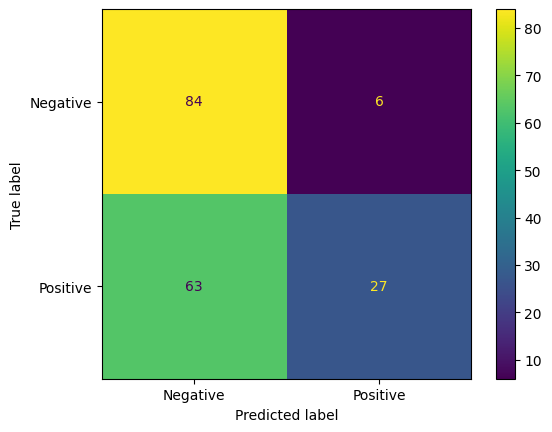

In [177]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
conf = confusion_matrix(true_label , pred_label)
ConfusionMatrixDisplay(
conf,display_labels = ['Negative','Positive']
).plot()

In [161]:
print(classification_report(true_label , pred_label))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2499
           1       0.08      0.30      0.13        90

    accuracy                           0.85      2589
   macro avg       0.53      0.59      0.52      2589
weighted avg       0.94      0.85      0.89      2589

